In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/bennett/dataScience/Projects/Netflix_Data_Analysis/mymoviedb.csv", encoding='utf-8',
    on_bad_lines='warn',          
    engine='python')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [7]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
df.duplicated().sum()

0

## Data Preprocessing
### Exploration Summary
- We have a dataframe consisting of 9827 rows and 9 columns.
- Our dataset looks bit tidy with no NaNs nor duplicated values.
- Release_Date column needs to be casted into date time and to extract only the year value.
- Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.


In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)

datetime64[ns]


In [10]:
df['Release_Date'] = df['Release_Date'].dt.year

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Droping the columns

In [12]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [13]:
df.drop(cols, axis = 1, inplace=True)

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [15]:
print(df['Vote_Count'].unique())

['8940' '1151' '122' ... '2395' '960' '1319']


In [17]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [18]:
df.dropna(subset=['Vote_Count', 'Vote_Average'], inplace=True)

In [23]:
df = df.astype({
    'Vote_Count': 'int',
    'Vote_Average': 'float'
})


In [24]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000,9826.000000
mean,2006.202931,40.323951,1392.943721,6.439467
std,15.686202,108.879332,2611.303856,1.129797
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128250,146.000000,5.900000
50%,2011.000000,21.195000,444.000000,6.500000
75%,2017.000000,35.179250,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


### Categorizing Vote_Average columm
We would cut Vote_Average values and make 4 categories: popular, average, below_average not_popular to describe it more using categorize_col() function provided above.

In [26]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [27]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

In [28]:
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [30]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [31]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [32]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


### We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [33]:
df['Genre'] = df['Genre'].str.split(',')

In [35]:
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


In [36]:
#Casting columm into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int32   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 750.2+ KB


In [38]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             38
dtype: int64

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


## Data Visualization

In [40]:
sns.set_style('whitegrid')

### What is the most frequent genre of movies released on netflix?

In [41]:
df['Genre'].describe()

count         25551
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

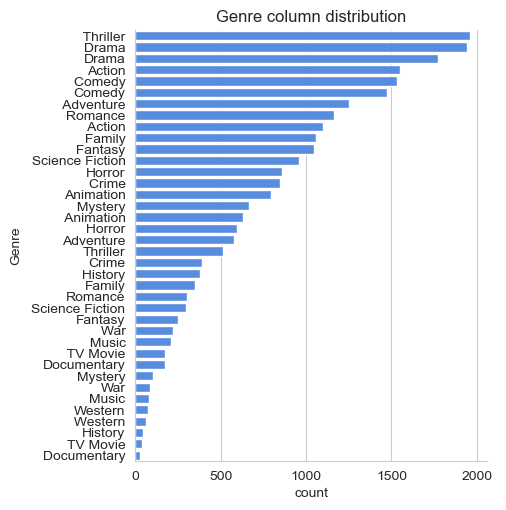

In [45]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color= '#4287f5')
plt.title('Genre column distribution')


plt.show()

### Which movie has highest votes in vote avg column?

In [46]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


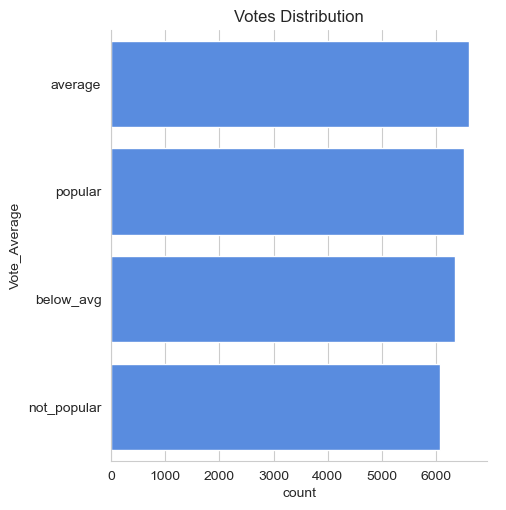

In [48]:
sns.catplot(y='Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4387f5')
plt.title('Votes Distribution')
plt.show()

### Which movie got the highest popularity? What's its genre?

In [52]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Which movie got the lowest popularity? What's its genre?

In [54]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021.0,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021.0,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021.0,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984.0,Threads,13.354,186,popular,War
25549,1984.0,Threads,13.354,186,popular,Drama
25550,1984.0,Threads,13.354,186,popular,Science Fiction


### Which year has the most filmed movies?

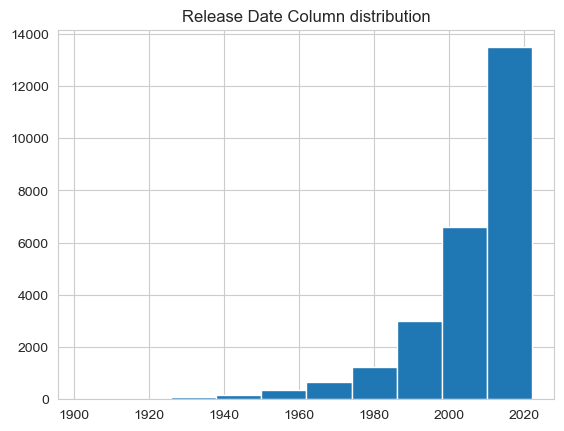

In [56]:
df['Release_Date'].hist()
plt.title("Release Date Column distribution")
plt.show()

## Summery 
- Drama genre is the most frequent genre in our dataset and has appeared more than 14%  of times among 19 other genres.
- We have 25.5% of our dataset with popular vote(6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularity.
- Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.
- The united stated, thread has the lowest rate in our dataset and it has genre of Action, Adventure and Science Fiction.
- Year 2020 has highest filming rate in our dataset.